In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

In [111]:
#Load data

df = pd.read_csv('churn.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [117]:
df['TotalCharges'].replace(' ', 0, inplace=True)

In [118]:
#Remove customer ID

df = df.loc[:, 'gender':'Churn']
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [119]:
# limit to categorical data using df.select_dtypes()
df_cat_lif = df.select_dtypes(include=[object])
df_cat_lif = df_cat_lif.drop(columns="TotalCharges")
df_cat_lif.head(2)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No


In [95]:
#Encode Labels

enc = preprocessing.LabelEncoder()

df_cat_lim = df_cat_lif.apply(enc.fit_transform)

df_cat_lim.head(2)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0


In [96]:
numeric_df =  df.select_dtypes(exclude=[object])
numeric_df.head(2)

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95


In [98]:

fixed_df = pd.concat([df_cat_lim, numeric_df, df['TotalCharges']], axis=1).reindex(df_cat_lim.index)
fixed_df = fixed_df.drop(columns="Churn")
fixed_df.head(2)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0,1,29.85,29.85
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0,34,56.95,1889.5


In [107]:
#Bring Back Churn Column
#There is probably a better way to do this
#churn_int = df_cat_lim['Churn'].to_numneric
df = pd.concat([fixed_df, df_cat_lim['Churn']], axis=1).reindex(fixed_df.index)
df.head(2)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0,1,29.85,29.85,0
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0,34,56.95,1889.5,0


In [108]:
#How many of each class is in the data 
df['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

#### 0-No : 5174 and 1-Yes : 1869 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb6baa6c898>]],
      dtype=object)

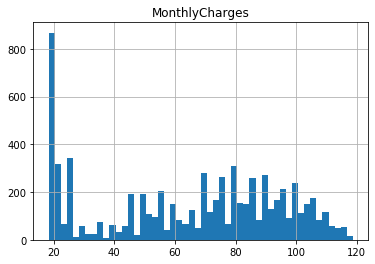

In [109]:
## Simple hist visualisation of  Monthly Charges
df.hist('MonthlyCharges', bins=50)

In [110]:
#To use Sklearn, we have to turn the data into np arrauy

X = df[['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'SeniorCitizen', 'tenure',
       'MonthlyCharges', 'TotalCharges']].values

X[0:5]

array([[0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 1, 2, 0, 1, 29.85,
        '29.85'],
       [1, 0, 0, 1, 0, 0, 2, 0, 2, 0, 0, 0, 1, 0, 3, 0, 34, 56.95,
        '1889.5'],
       [1, 0, 0, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0, 1, 3, 0, 2, 53.85,
        '108.15'],
       [1, 0, 0, 0, 1, 0, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 45, 42.3,
        '1840.75'],
       [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 70.7,
        '151.65']], dtype=object)

In [73]:
y = df['Churn'].values
y[0:5]

array([0, 0, 1, 0, 1])

In [104]:
#Normalise Data

X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

ValueError: could not convert string to float: 